<a href="https://colab.research.google.com/github/manjirigujar/PredictingArrivalDelays/blob/main/Carrier_performance_models_w_o_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Carrier_Performance

/content/drive/MyDrive/Carrier_Performance


In [ ]:
df1 = pd.read_csv('C5.csv')

In [ ]:
df2 = pd.read_csv('G7.csv')

In [ ]:
df3 = pd.read_csv('HA.csv')

In [ ]:
df4 = pd.read_csv('G4.csv')

In [ ]:
df5 = pd.read_csv('PT.csv')

In [ ]:
df6 = pd.read_csv('QX.csv')

In [ ]:
df7 = pd.read_csv('ZW.csv')

In [ ]:
df8 = pd.read_csv('F9.csv')

In [ ]:
df9 = pd.read_csv('YV.csv')

In [ ]:
df10 = pd.read_csv('NK.csv')

In [ ]:
df11 = pd.read_csv('AS.csv')

In [ ]:
# append multiple DataFrames
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)

In [ ]:
#df['Operating_Airline'].unique()

In [ ]:
#df['Year'].unique()

## **Exploratory Data Analysis and Data Pre-Processing**




In [ ]:
indexNames = df[(df['Cancelled'] == 1) | (df['Diverted'] == 1)].index
df.drop(indexNames, inplace=True)


In [ ]:
df['Cancelled'].unique()

array([0.])

In [ ]:
# Drop the "Cancelled" and "CancelledCode" columns
columns_to_drop = ["Cancelled", "CancellationCode", "Diverted", "Flights"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Find columns with null values
#null_columns = df.columns[df.isnull().any()].tolist()

#print(null_columns)

['WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [ ]:
index_drop = df[df['ArrDel15'].isnull()].index

In [ ]:
index_drop

Int64Index([3097291], dtype='int64')

In [ ]:
df.drop(index_drop, inplace = True)

In [ ]:
index_2020 = df[df['Year'] == 2020].index

In [ ]:
df.drop(index_2020, inplace = True)

In [ ]:
#Checking for duplicate rows in the dataset
#df.duplicated().sum()

0

In [ ]:
df.fillna(0, inplace = True)

In [ ]:
df['CarrierDelay'].isna().value_counts()

False    5742889
Name: CarrierDelay, dtype: int64

In [ ]:
#Separating the numerical and categorical variables
numerical_variables = df.select_dtypes(include = ['int64' , 'float64'])
categorical_variables = df.select_dtypes(include = 'object')

In [ ]:
corr_mat = numerical_variables.corr()

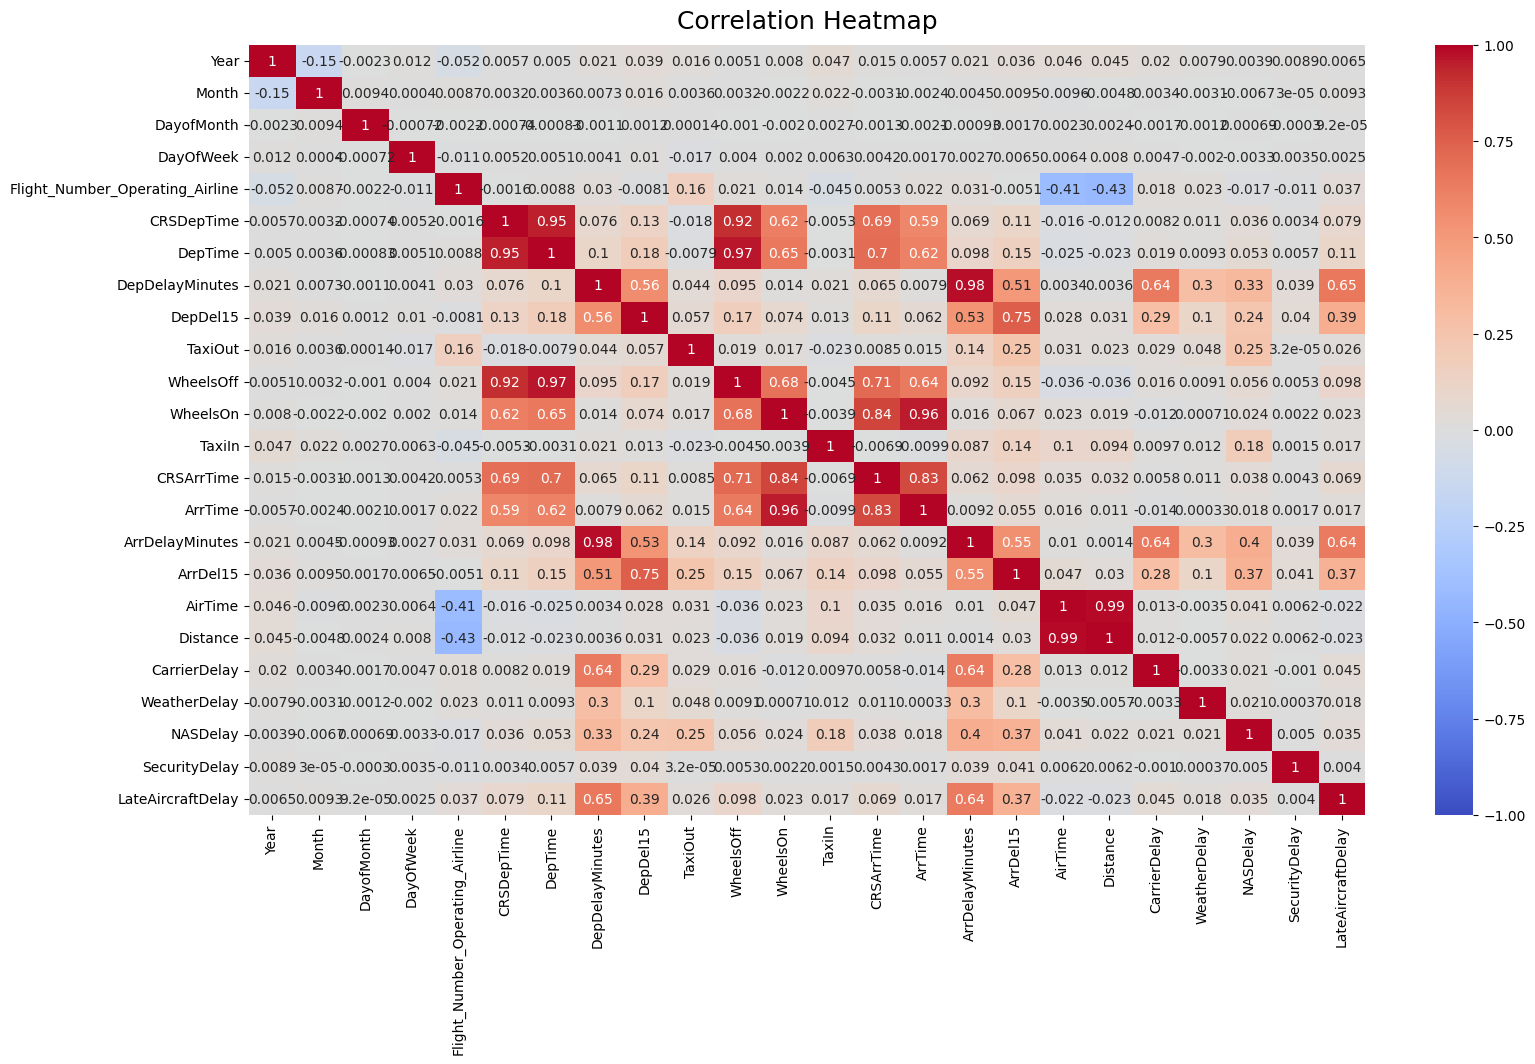

In [ ]:
# Set the color map to show both positive and negative correlations
fig = plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()


In [ ]:
categorical_variables.head()

,Operating_Airline,Operating_Airline_Name,Tail_Number,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTimeBlk,ArrTimeBlk,Distance_Group_Discription,Holiday
0,C5,CommuteAir LLC dba CommuteAir,N33182,IAH,"Houston, TX",Texas,GPT,"Gulfport/Biloxi, MS",Mississippi,1100-1159,1300-1359,250-499 Miles,No Holiday
1,C5,CommuteAir LLC dba CommuteAir,N14203,BTR,"Baton Rouge, LA",Louisiana,IAH,"Houston, TX",Texas,0700-0759,0800-0859,250-499 Miles,No Holiday
2,C5,CommuteAir LLC dba CommuteAir,N12167,IAH,"Houston, TX",Texas,LBB,"Lubbock, TX",Texas,1800-1859,1900-1959,250-499 Miles,No Holiday
3,C5,CommuteAir LLC dba CommuteAir,N12195,IAH,"Houston, TX",Texas,LIT,"Little Rock, AR",Arkansas,1000-1059,1200-1259,250-499 Miles,No Holiday
4,C5,CommuteAir LLC dba CommuteAir,N14158,LRD,"Laredo, TX",Texas,IAH,"Houston, TX",Texas,1400-1459,1500-1559,250-499 Miles,No Holiday


In [ ]:
#checking the standard deviation of numerical variables
numerical_variables.std()

Year                                  1.707832
Month                                 3.428904
DayofMonth                            8.775203
DayOfWeek                             2.011195
Flight_Number_Operating_Airline    2180.502583
CRSDepTime                          489.922488
DepTime                             504.064535
DepDelayMinutes                      49.950654
DepDel15                              0.393170
TaxiOut                               9.356497
WheelsOff                           505.413642
WheelsOn                            531.678392
TaxiIn                                6.754330
CRSArrTime                          514.156062
ArrTime                             537.306859
ArrDelayMinutes                      49.929445
ArrDel15                              0.406765
AirTime                              75.679916
Distance                            637.392776
CarrierDelay                         30.426716
WeatherDelay                         14.372953
NASDelay     

In [ ]:
#finding the number of unique values in all variables
for column in categorical_variables.columns:
    print(column,categorical_variables[column].nunique())

Operating_Airline 11
Operating_Airline_Name 11
Tail_Number 1487
Origin 298
OriginCityName 292
OriginStateName 53
Dest 299
DestCityName 293
DestStateName 53
DepTimeBlk 19
ArrTimeBlk 19
Distance_Group_Discription 11
Holiday 13


In [ ]:
#dropping columns from the model to reduce multi-collinearity
columns_to_drop = ["Year", "Flight_Number_Operating_Airline", "Tail_Number", "Operating_Airline", "OriginCityName", "Distance_Group_Discription", "OriginStateName", "DestCityName", "DestStateName", "CRSDepTime", "DepTime", "CRSArrTime", "ArrTime", "ArrDelayMinutes", "AirTime", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5742889 entries, 0 to 6823516
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Month                   int64  
 1   DayofMonth              int64  
 2   DayOfWeek               int64  
 3   Operating_Airline_Name  object 
 4   Origin                  object 
 5   Dest                    object 
 6   DepDelayMinutes         float64
 7   DepDel15                float64
 8   DepTimeBlk              object 
 9   TaxiOut                 float64
 10  WheelsOff               float64
 11  WheelsOn                float64
 12  TaxiIn                  float64
 13  ArrDel15                float64
 14  ArrTimeBlk              object 
 15  Distance                float64
 16  Holiday                 object 
dtypes: float64(8), int64(3), object(6)
memory usage: 788.7+ MB


In [ ]:
#df['CRSDepTime'] = np.ceil(df['CRSDepTime']/600).apply(int)
#df['CRSArrTime'] = np.ceil(df['CRSDepTime']/600).apply(int)
#df['ArrTime'] = np.ceil(df['ArrTime']/600).apply(int)
#df['DepTime'] = np.ceil(df['DepTime']/600).apply(int)
df['WheelsOff'] = np.ceil(df['WheelsOff']/600).apply(int)
df['WheelsOn'] = np.ceil(df['WheelsOn']/600).apply(int)
#df.CRSDepTime.value_counts(normalize=True)
#df.CRSArrTime.value_counts(normalize=True)
#df.ArrTime.value_counts(normalize=True)
#df.DepTime.value_counts(normalize=True)
df.WheelsOff.value_counts(normalize=True)
df.WheelsOn.value_counts(normalize=True)

3    0.357338
4    0.320174
2    0.281925
1    0.040563
Name: WheelsOn, dtype: float64

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
# Label encoding features to change categorical variables into numerical one
#df['Operating_Airline_Name'] = le.fit_transform(df['Operating_Airline_Name'])
#df['Origin'] = le.fit_transform(df['Origin'])
#df['OriginCityName'] = le.fit_transform(df['OriginCityName'])
#df['Dest'] = le.fit_transform(df['Dest'])
#df['DestCityName'] = le.fit_transform(df['DestCityName'])
#df['DestStateName'] = le.fit_transform(df['DestStateName'])
#df['Holiday'] = le.fit_transform(df['Holiday'])
#df['OriginStateName'] = le.fit_transform(df['OriginStateName'])

In [ ]:
#creating a variable and assigning the target column
y = df['ArrDel15']

In [ ]:
#creating a new variable and assigning the rest of the dataframe without the target column
X = df.drop("ArrDel15", axis = 1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5742889 entries, 0 to 6823516
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Month                   int64  
 1   DayofMonth              int64  
 2   DayOfWeek               int64  
 3   Operating_Airline_Name  object 
 4   Origin                  object 
 5   Dest                    object 
 6   DepDelayMinutes         float64
 7   DepDel15                float64
 8   DepTimeBlk              object 
 9   TaxiOut                 float64
 10  WheelsOff               int64  
 11  WheelsOn                int64  
 12  TaxiIn                  float64
 13  ArrTimeBlk              object 
 14  Distance                float64
 15  Holiday                 object 
dtypes: float64(5), int64(5), object(6)
memory usage: 744.9+ MB


In [ ]:
#pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
#from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 64)

In [ ]:
# Calculate class frequencies
class_freq = np.bincount(y_train)
print("Class frequencies:", class_freq)

Class frequencies: [3179693  840329]


In [ ]:
# Calculate class weights
class_weights = len(y_train) / (2 * class_freq)
class_weights = dict(zip([0, 1], class_weights))
print("Class weights:", class_weights)

Class weights: {0: 0.6321399581657726, 1: 2.3919333975145447}


In [ ]:
#tree_clf = DecisionTreeClassifier(criterion='gini', max_depth= 5, class_weight=class_weights)
#tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.6321399581657726,
                                     1: 2.3919333975145447},
                       max_depth=5)

In [ ]:
#y_pred_dt = tree_clf.predict(X_test)

In [ ]:
#pred_acc = accuracy_score(y_test, y_pred_dt)

In [ ]:
#pred_acc

0.9044192035717209

In [ ]:
#conf_matrix = confusion_matrix(y_test, y_pred_dt)
#conf_matrix

array([[1265207,   96356],
       [  68317,  292987]])

In [ ]:
def plot_confusion_matrix(conf_matrix, labels):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    #plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Define your class labels
class_labels = ['On-Time', 'Delayed']  # Replace with your actual class labels

# Plot the confusion matrix
#plot_confusion_matrix(conf_matrix, class_labels)
#plt.show()


In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 10))
    plt.barh(range(n_features), model.feature_importances_, color='k', align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.grid(True)



#plot_feature_importances(tree_clf)
#plt.rcParams["figure.facecolor"] = "lightblue"



In [ ]:
# instantiating the RandomForestClassifier
#forest = RandomForestClassifier()
#forest.fit(X_train, y_train)

#check the accuracy score
#forest.score(X_train, y_train)



RandomForestClassifier()

In [ ]:
#y_pred_rf = forest.predict(X_test)

In [ ]:
#acc_forest = accuracy_score(y_test, y_pred_rf)
#acc_forest

0.920582958522045

In [ ]:
#conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
#conf_mat_rf

array([[1324096,   37467],
       [  99358,  261946]])

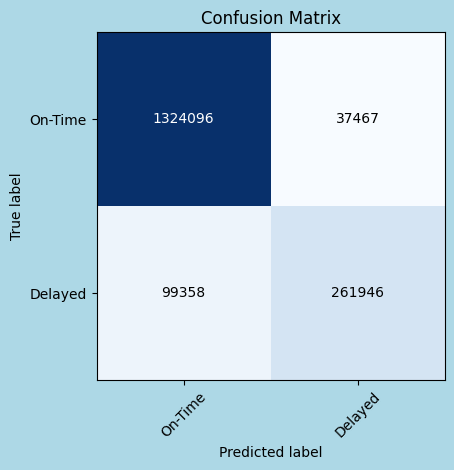

In [ ]:
# Plot the confusion matrix
#plot_confusion_matrix(conf_mat_rf, class_labels)
#plt.show()

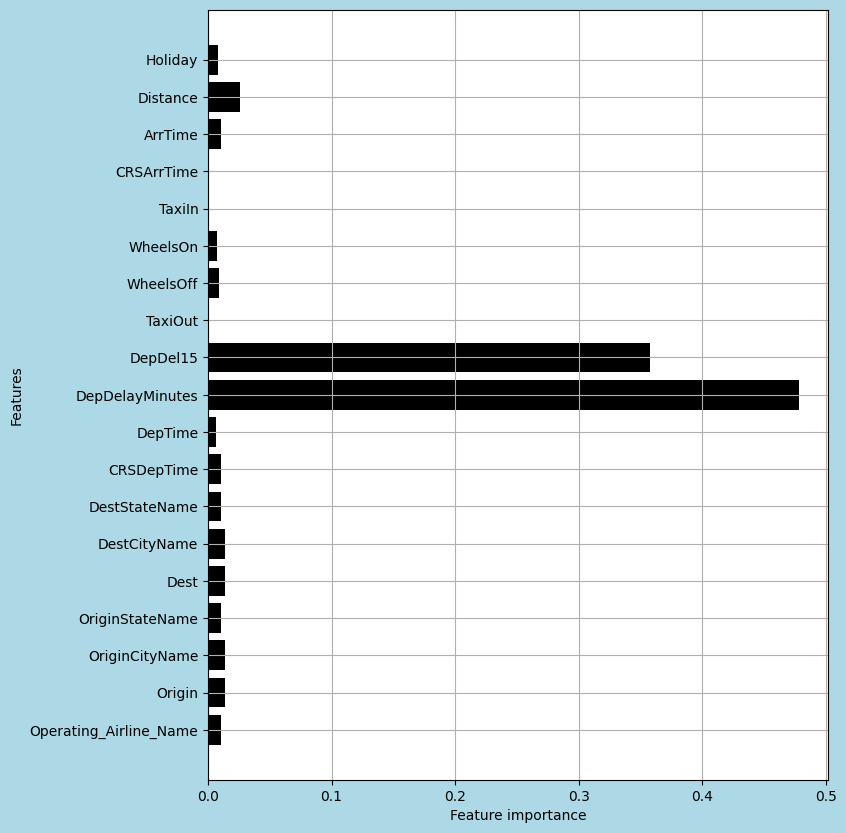

In [ ]:
#plot_feature_importances(forest)
#plt.rcParams["figure.facecolor"] = "lightblue"

In [ ]:
cat_variables = list(df.select_dtypes(include=['object']).columns)

In [ ]:
cat_model = CatBoostClassifier(iterations=100, cat_features=cat_variables, class_weights=class_weights, max_depth = 5, verbose=False)

In [ ]:
cat_model.fit(X_train, y_train)

In [ ]:
y_pred_cat = cat_model.predict(X_test)

In [ ]:
acc_cat = accuracy_score(y_test, y_pred_cat)
acc_cat

0.9328752596689124

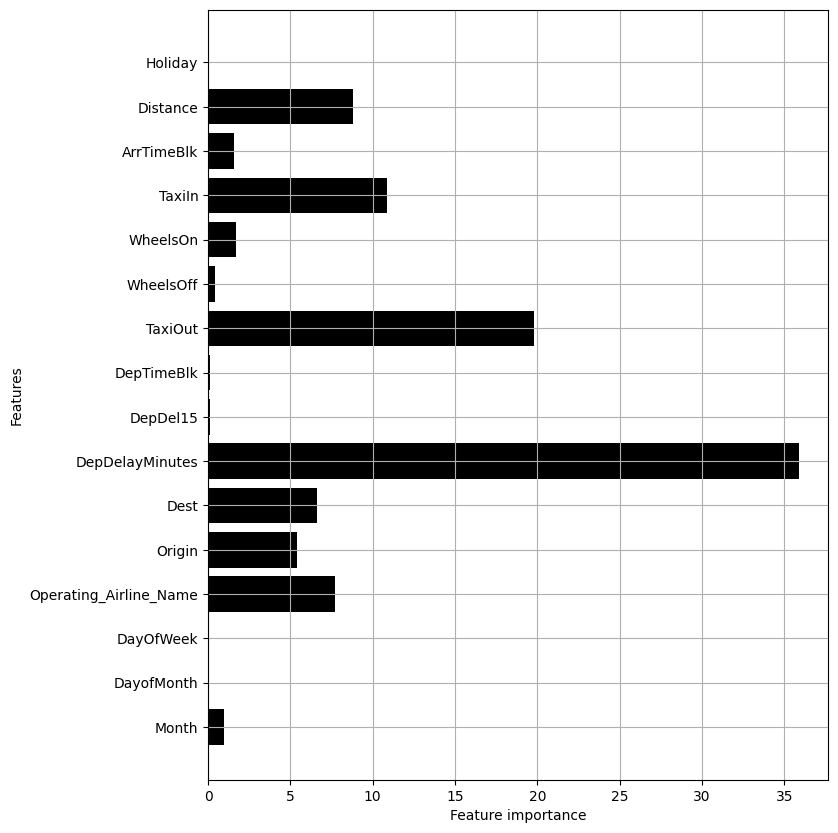

In [ ]:
plot_feature_importances(cat_model)

In [ ]:
conf_mat_cat = confusion_matrix(y_test, y_pred_cat)
conf_mat_cat

array([[1276946,   84617],
       [  31030,  330274]])

In [ ]:
report = classification_report(y_test, y_pred_cat)
report

'              precision    recall  f1-score   support\n\n         0.0       0.98      0.94      0.96   1361563\n         1.0       0.80      0.91      0.85    361304\n\n    accuracy                           0.93   1722867\n   macro avg       0.89      0.93      0.90   1722867\nweighted avg       0.94      0.93      0.93   1722867\n'

In [ ]:
report

'              precision    recall  f1-score   support\n\n         0.0       0.98      0.94      0.96   1361563\n         1.0       0.80      0.91      0.85    361304\n\n    accuracy                           0.93   1722867\n   macro avg       0.89      0.93      0.90   1722867\nweighted avg       0.94      0.93      0.93   1722867\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("AUC:", roc_auc)


NameError: ignored